This is currently under construction.

This notebook contains the functions that are called inside the rubix pipeline.

# Config

contains all the information needed to run the pipeline. Those are run specfic configurations.

In [9]:
import os
config = {
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars", "gas"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 11,
        "reuse": False,
        "overwrite": True
        },
        "subset": {
            "use_subset": True,
            "subset_size": 1000,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-11.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE"},
        
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1}

        
}

In [10]:
# NBVAL_SKIP
from rubix.core.data import convert_to_rubix, prepare_input

convert_to_rubix(config) # Convert the config to rubix format and store in output_path folder
#for gas and stars
#coords, vel, metalicity, mass, age, halfmass_r, gas_coords, gas_vel, gas_metallicity, gas_mass, gas_density, gas_sfr, gas_internal_energy, gas_electron_abundance = prepare_input(config) # Prepare the input for the pipeline
#for gas only
#gas_coords, gas_vel, gas_metallicity, gas_mass, gas_density, gas_hsml, gas_sfr, gas_internal_energy, gas_electron_abundance, gas_metals, halfmass_r = prepare_input(config) # Prepare the input for the pipeline
#for stars only
#
#coords, vel, metalicity, mass, age, halfmass_r = prepare_input(config) # Prepare the input for the pipeline
rubixdata = prepare_input(config) # Prepare the input for the pipeline
print(prepare_input(config))

2024-06-26 10:32:22,222 - rubix - INFO - Loading data from IllustrisAPI
2024-06-26 10:32:22,224 - rubix - DEBUG - Loading galaxy with ID 11
2024-06-26 10:32:22,225 - rubix - DEBUG - Creating Url for stars
2024-06-26 10:32:22,225 - rubix - DEBUG - Fields for stars: ['Coordinates', 'GFM_InitialMass', 'GFM_Metallicity', 'GFM_StellarFormationTime', 'Velocities']
2024-06-26 10:32:22,226 - rubix - DEBUG - Creating Url for gas
2024-06-26 10:32:22,227 - rubix - DEBUG - Fields for gas: ['Coordinates', 'Density', 'Masses', 'GFM_Metallicity', 'StarFormationRate', 'InternalEnergy', 'Velocities', 'ElectronAbundance']
2024-06-26 10:32:22,228 - rubix - DEBUG - Downloading Data from http://www.tng-project.org/api/TNG50-1/snapshots/99/subhalos/11/cutout.hdf5?stars=Coordinates,GFM_InitialMass,GFM_Metallicity,GFM_StellarFormationTime,Velocities&gas=Coordinates,Density,Masses,GFM_Metallicity,StarFormationRate,InternalEnergy,Velocities,ElectronAbundance
2024-06-26 10:32:22,229 - rubix - DEBUG - Performing 

RubixData(galaxy=Galaxy(redshift=2.220446049250313e-16, center=array([10410.08408094, 35160.6188816 , 30040.60047238]), halfmassrad_stars=8.711988190754308), stars=StarsData(coords=array([[ -8.35817233,   0.3416457 ,  10.20366487],
       [  1.06628383,  -1.49286917,  -0.27716144],
       [  2.04225495, -13.07657674,   3.53097812],
       ...,
       [ -5.52533175,  -0.27240021,   9.43913371],
       [ -6.50614468,  10.23248936,   1.33017453],
       [-18.60511272,   5.80675187,   9.56518098]]), mass=array([105540.35680358,  94560.37114498, 147049.20483626,  86763.76108359,
        78013.69040149,  80586.44107955, 100183.03494965,  98731.64195398,
        90257.25724642, 101347.97035762,  72780.98355717,  98793.29670267,
        98259.87440966,  57567.59471446, 105362.43413573,  95771.02222539,
        90858.02031702, 129014.86787912,  82256.56878418, 105352.18108839,
        95857.35888837,  91306.25225048,  86496.32667421, 108846.94182405,
       100206.80709932,  59974.90469532, 102

In [11]:
print(rubixdata.galaxy)
print(rubixdata.stars.velocity)
print(rubixdata.gas.velocity)

Galaxy(redshift=2.220446049250313e-16, center=array([10410.08408094, 35160.6188816 , 30040.60047238]), halfmassrad_stars=8.711988190754308)
[[-1.5355250e-15 -4.5847776e-15 -4.9232096e-16]
 [ 1.4683807e-15  2.7118653e-15 -5.5884811e-15]
 [ 4.7336800e-15 -1.3261995e-17 -4.2374483e-15]
 ...
 [ 1.7550438e-15 -4.2094268e-15 -1.7362481e-17]
 [-1.4768257e-15 -2.2087672e-15  4.3089320e-15]
 [ 5.0407778e-16 -3.4783628e-15  4.1021882e-15]]
[[ 1.0260076e-15 -2.8088189e-15  1.3423863e-15]
 [ 2.7939263e-15 -1.1099427e-15 -4.2885126e-15]
 [ 2.1811268e-16 -2.4133519e-15  2.9182767e-15]
 ...
 [ 1.5891304e-15  1.0872566e-15 -4.5024578e-15]
 [-1.7544238e-15  2.0210553e-15  3.0112995e-15]
 [-3.5600117e-16  1.9346580e-15  6.7015273e-15]]


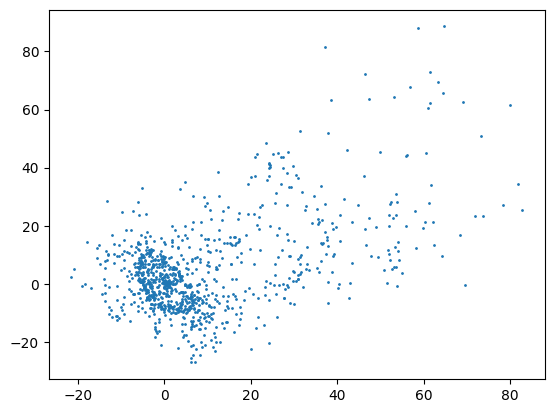

In [12]:
# NBVAL_SKIP
import matplotlib.pyplot as plt
# Make a scatter plot 
n_subset = 10000
subset = rubixdata.gas.coords[:n_subset]

plt.scatter(subset[:,0], subset[:,1], s=1)

#print(rubixdata.stars.coordinates)


Get the function that does the binning

In [8]:
# NBVAL_SKIP
from rubix.core.telescope import get_spatial_bin_edges,get_spaxel_assignment

In [9]:
# NBVAL_SKIP
bin_particles = get_spaxel_assignment(config)
edges = get_spatial_bin_edges(config)

/home/annalena/rubix/rubix/telescope/factory.py:20: UserWarning: No telescope config provided, using default stored in /home/annalena/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/home/annalena/rubix/rubix/telescope/factory.py:20: UserWarning: No telescope config provided, using default stored in /home/annalena/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(


In [12]:
# NBVAL_SKIP
# Make a scatter plot of the spaxels
spaxel_index = bin_particles(rubixdata.gas.coords)

print("Shape of spaxel_index", spaxel_index.shape)

Shape of spaxel_index (1000,)


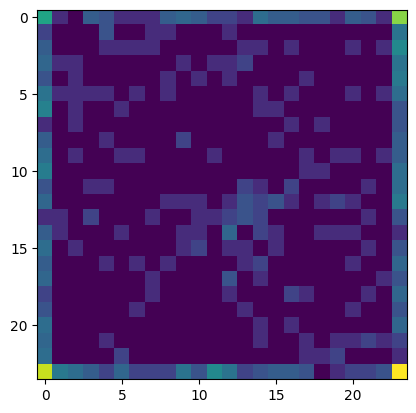

In [13]:
# NBVAL_SKIP
# Calculate binned image


spatial_bin_edges = edges
pixel_assignments = spaxel_index
import numpy as np
image = np.zeros((len(spatial_bin_edges) - 1, len(spatial_bin_edges) - 1))

# Count the number of particles in each pixel
for i in range(len(spatial_bin_edges) - 1):
    for j in range(len(spatial_bin_edges) - 1):
        image[i, j] = np.sum(pixel_assignments == (i + (len(spatial_bin_edges) - 1) * j))

image = np.log10(image + 1)
plt.imshow(image, cmap="viridis")